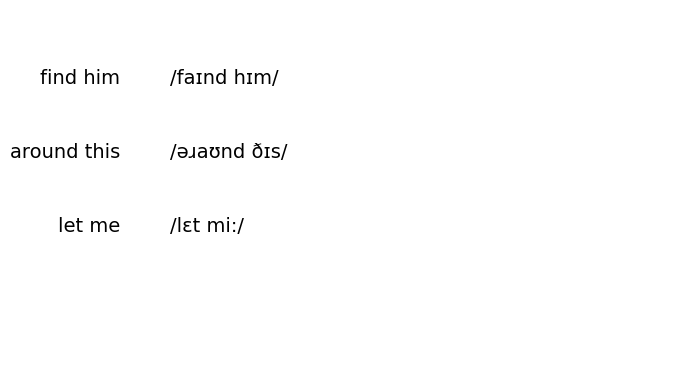

In [4]:
import numpy as np

# Check if matplotlib is installed and handle gracefully if it's not
try:
    import matplotlib.pyplot as plt
    from matplotlib.animation import FuncAnimation
    MATPLOTLIB_AVAILABLE = True
except ImportError:
    MATPLOTLIB_AVAILABLE = False

if MATPLOTLIB_AVAILABLE:
    # Define the phrases and their phonetic representations
    phrases = ["find him", "around this", "let me"]
    phonemes = ["/faɪnd hɪm/", "/əɹaʊnd ðɪs/", "/lɛt mi:/"]
    deletions = [[5, 6], [3, 4], [1]]  # Corrected indexes of phonemes to delete

    # Create the figure and axes
    fig, ax = plt.subplots()
    ax.axis('off')  # Turn off the axes
    texts = []
    full_texts = []  # Store the full phoneme sequences

    # Initialize display positions
    y_offset = 0.8
    for phrase, phonetic in zip(phrases, phonemes):
        ax.text(-0.1, y_offset, phrase, fontsize=14, ha='right', transform=ax.transAxes)
        text_obj = ax.text(0.0, y_offset, phonetic, fontsize=14, ha='left', color='black', transform=ax.transAxes)
        texts.append(text_obj)
        full_texts.append(list(phonetic))
        y_offset -= 0.2

    # Update function for animation
    def update(frame):
        for i, (text, phonetic, del_indices) in enumerate(zip(texts, full_texts, deletions)):
            current_text = list(phonetic)

            if frame == 0:
                # Step 1: Everything in black
                text.set_text(''.join(current_text))
                text.set_color('black')

            elif frame == 1:
                # Step 2: Highlight relevant phonemes in red
                highlighted_text = ''.join(
                    char if idx not in del_indices else f"{char}"
                    for idx, char in enumerate(current_text)
                )
                text.set_text(highlighted_text)
                text.set_color('black')

            elif frame == 2:
                # Step 3: Remove the highlighted phonemes
                for idx in del_indices:
                    current_text[idx] = ''
                text.set_text(''.join(current_text))

            elif frame == 3:
                # Step 4: Slide remaining phonemes together
                compacted_text = ''.join([char for char in current_text if char != ''])
                text.set_text(compacted_text)

    # Set up animation
    anim = FuncAnimation(
        fig, update, frames=4, interval=1000, repeat=False
    )

    # Save the animation
    anim.save('phoneme_deletion.gif', writer='imagemagick')

    plt.show()
else:
    print("Matplotlib is not installed. Please install matplotlib to run this script.")
